In [3]:
import numpy as np
import pandas as pd
import seaborn as  sn
import sklearn as sk
import matplotlib.pyplot as plt
import scipy as sp

In [4]:
from scipy.spatial.distance import cdist 
from sklearn.datasets import make_blobs

sn.set()

In [5]:
def fit(X, k):
    # Take k random points from dataset and initialize them as centroids
    centroids = X[np.random.randint(0, X.shape[0], size=k)]
    # compute initial labels for each data points
    labels = np.argmin(cdist(X, centroids), axis=1)
    for _iteration in range(10):
        # copy labels for all points for comparing laters
        #pre_labels = labels.copy()
        # computing the new centroids
        new_centroids = np.array([np.mean(X[labels==r], axis=0) for r in range(k)])
        # compute the new labels
        new_labels = np.argmin(cdist(X, new_centroids), axis=1)

        # if labels of points are not changing
        if all(new_labels==labels):
            break
    return (new_centroids, new_labels)

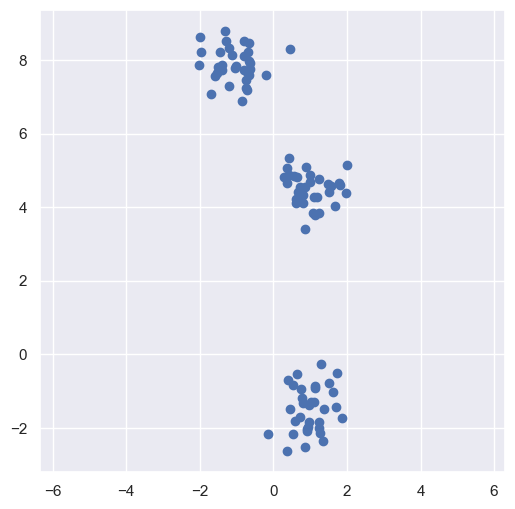

In [18]:
cluster_counts = 3

X, y = make_blobs(n_samples=100,
                  centers=cluster_counts,
                  cluster_std=0.55,
                  random_state=0,
                  n_features=3
                  )

plt.figure(figsize=(6, 6))
ax = plt.gca()
ax.axis('equal')
plt.scatter(X[:, 0], X[:, 1])

plt.show()

In [19]:
centroids, labels = fit(X, cluster_counts)
display(centroids, labels)

array([[ 1.04733001,  0.54329093,  2.57860718],
       [-1.04679852,  7.87739493,  9.04055235],
       [ 0.82104746,  4.723636  ,  1.61651233]])

array([0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 2, 1, 2, 1, 0, 0,
       0, 2, 1, 1, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 0, 1, 1, 1, 0, 1, 0,
       0, 2, 1, 2, 1, 2, 1, 1, 2, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0,
       1, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, 2, 2, 1,
       1, 1, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0], dtype=int64)

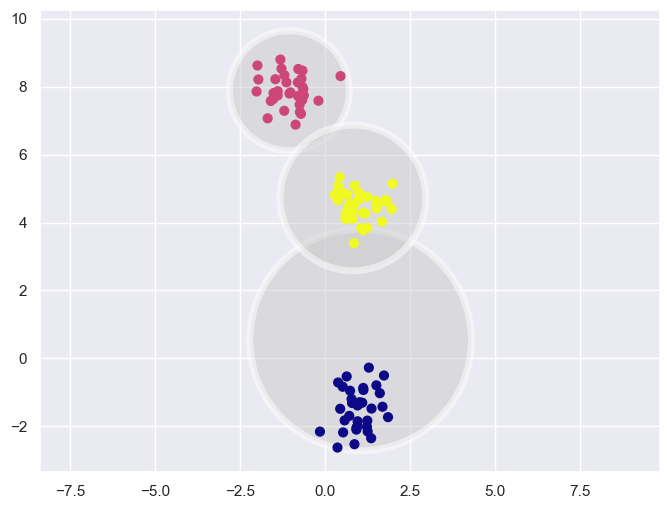

In [20]:
# How to visualize it
def Visualize_KMeans(X, centroids, labels, rseed=0, ax=None):
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c = labels, s = 40, cmap='plasma', zorder=2)
    #PLot the respresentation  of the KMeans model
    radii = [cdist(X[labels == i], [center]).max() for i, center in enumerate(centroids)]

    for c, r in zip(centroids, radii):
        ax.add_patch(plt.Circle(c, r, fc="#CCCCCC", lw=5, alpha=0.5, zorder=1))

plt.figure(figsize=(8, 6))
Visualize_KMeans(X, centroids, labels)